<a href="https://colab.research.google.com/github/123nishant/Google-Colab/blob/master/Analytics_Vidhya_Big_Mart_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
train =  pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
# Checking the percentage of empty values in train
train.isnull().sum() / train.shape[0] * 100 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
# Checking percentage of empty values in test
test.isnull().sum() / test.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

**Missing values present in Item_Weight and Outlet_Size**

In [7]:
# Categorical Features 

categorical = train.select_dtypes(include = [np.object])
print("Categorical Features in Train Set : ", categorical.shape[1])

# Numerical Features
numerical = train.select_dtypes(include = [np.float64, np.int64])
print("Numerical Features in Train Set : ", numerical.shape[1])

Categorical Features in Train Set :  7
Numerical Features in Train Set :  5


In [8]:
# Categorical Features 
categorical = test.select_dtypes(include = [np.object])
print ( "Categorical Features in Test set : ", categorical.shape[0])

# Numerical Features 
numerical = test.select_dtypes(include = [np.float64, np.int64])
print("Numerical Features in Test Set :", numerical.shape[1])

Categorical Features in Test set :  5681
Numerical Features in Test Set : 4


# Cleaning Data


### Item Weight

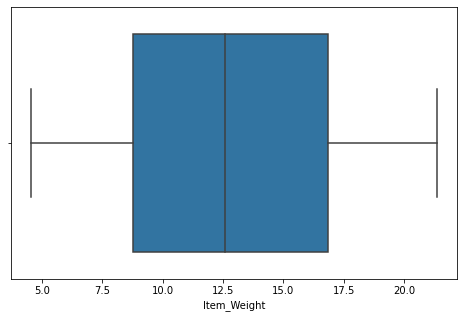

In [9]:
plt.figure(figsize = (8, 5))
sns.boxplot('Item_Weight', data = train)

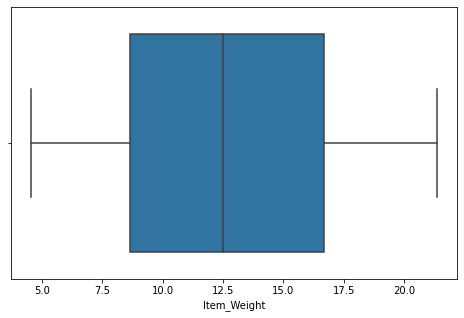

In [10]:
plt.figure(figsize = (8, 5))
sns.boxplot('Item_Weight', data = test)

Box Plot has no outliers. Hence we can replace the missing values with the mean value

In [11]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [12]:
train['Item_Weight'].isnull().sum(), test['Item_Weight'].isnull().sum()

(0, 0)

### Outlet Size


In [13]:
train['Outlet_Size'].isnull().sum(), test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [14]:
print(train['Outlet_Size'].value_counts())
print('************************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
************************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


**Since the outlet size is a Categorical Column, we can impute the missing values by 'MODE' (Most Repeated Value) from the column**

In [15]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

Successfully Imputed the missing values in teh categorical column Outlet_Size

## EDA

In [16]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'],inplace = True)

In [20]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype(str)

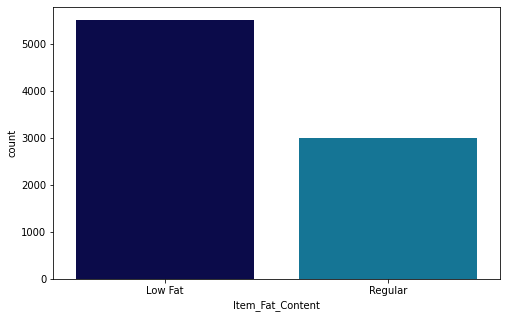

In [21]:
plt.figure(figsize = (8, 5))
sns.countplot('Item_Fat_Content', data = train, palette = 'ocean')

**Items bought are more of Low Fat**

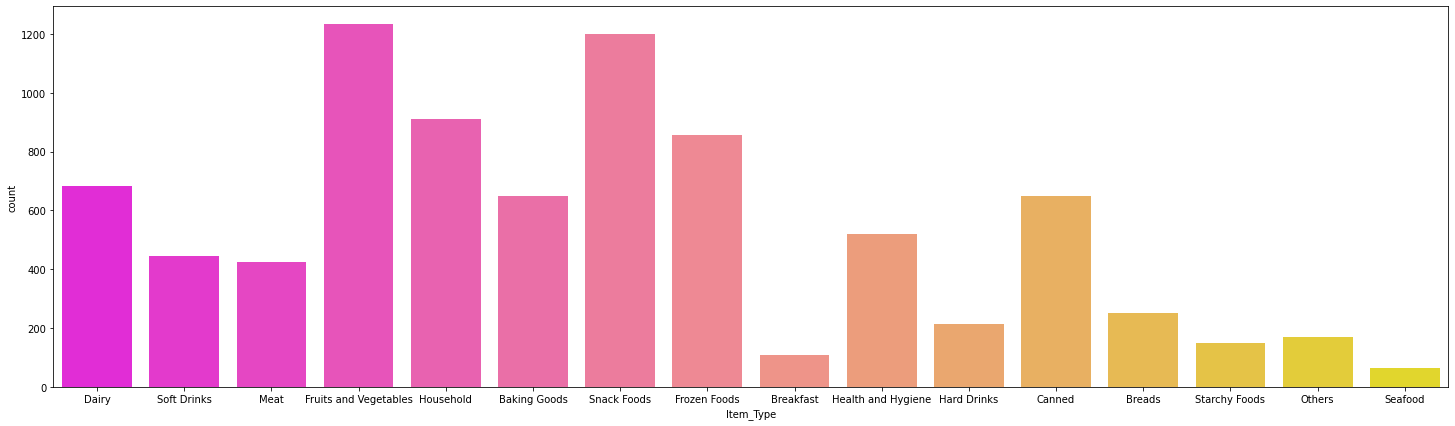

In [22]:
plt.figure(figsize = (25, 7))
sns.countplot('Item_Type', data = train, palette = 'spring')

### 'Fruits and Vegetables' are largely sold
### Snack Foods have good sales. 

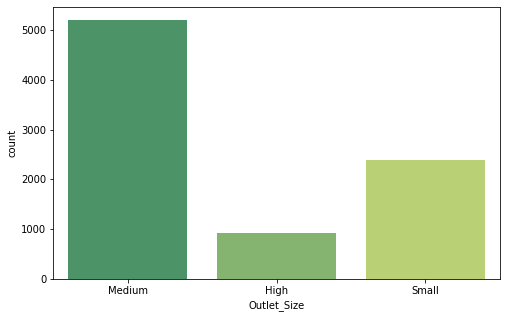

In [23]:
plt.figure(figsize = (8, 5))
sns.countplot('Outlet_Size', data = train, palette = 'summer')

## The outlets are of Medium Size

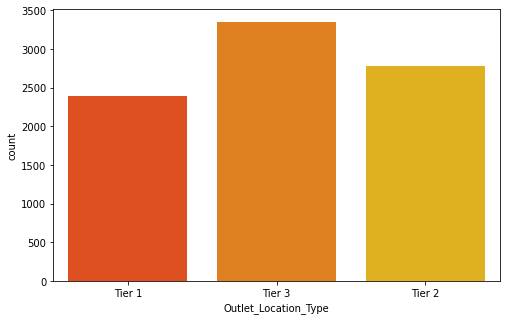

In [24]:
plt.figure(figsize = (8, 5))
sns.countplot('Outlet_Location_Type', data = train, palette = 'autumn')

**Outlets are maximum in Number 3 Cities**

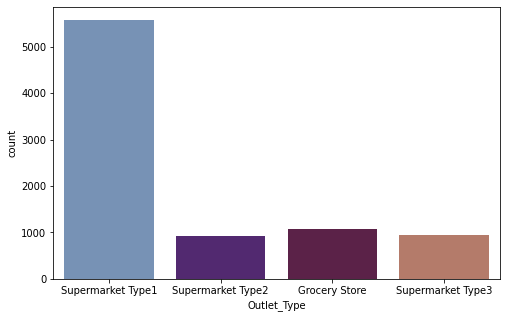

In [25]:
plt.figure(figsize = (8, 5))
sns.countplot('Outlet_Type', data = train, palette = 'twilight')

**Outlets are more of Supermarket Type1**

In [26]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

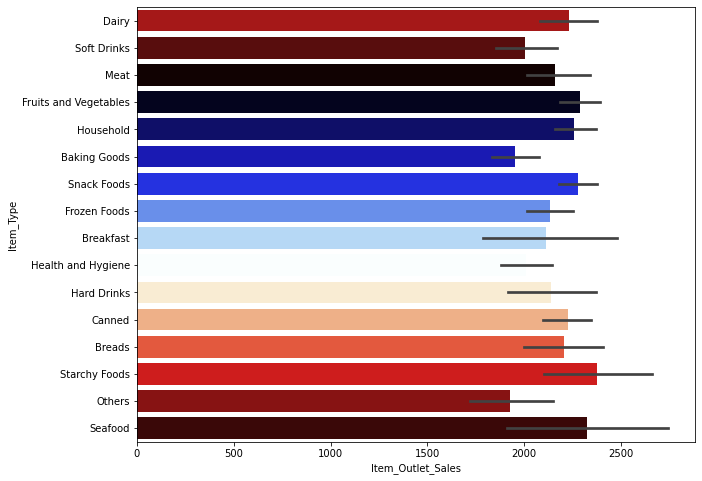

In [27]:
plt.figure(figsize = (10, 8))
sns.barplot(y = 'Item_Type', x = 'Item_Outlet_Sales', data = train, palette = 'flag')

**Products were Fruit Veggies and Snack Foods but the sales of Seafood and Starchy by Foods seems higher and hence hte sales can be improved with having stock of products that are most bought by customers**

## Feature Engineering

**Determine years of operation of a store**

In [28]:
# Years : 
train['Outlet_Years'] = 2021 - train['Outlet_Establishment_Year']
test['Outlet_Years'] = 2021 - test['Outlet_Establishment_Year']

**Create broad category of type of item**

In [29]:
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDP25     9
NCJ30     9
FDW49     9
         ..
FDN52     1
FDE52     1
FDT35     1
FDY43     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [30]:
# Taking only 1st 2 characters
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])


In [31]:
train['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

In [32]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD' : 'Food',
                                                              'NC' : 'Non-Consumable',
                                                              'DR' : 'Drinks'})

In [33]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD' : 'Food',
                                                              'NC' : 'Non-Consumable',
                                                              'DR' : 'Drinks'})

**Modify Categories of Item_Fat_Content :**

In [34]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [35]:
# Marking non - consumable as a separate category in Low Fat : 
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [36]:
# Marking non - consumable as a separate category in Low Fat : 
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

**Numerical and One-Hot Encoding of Categorical Variables**

In [37]:
# Import Library :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# New Variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

le = LabelEncoder()
for i in var_mod:
  train[i] = le.fit_transform(train[i])

# One Hot Coding : 
train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Outlet_Location_Type',
                                         'Outlet_Size', 'Item_Type_Combined', 'Outlet'])

In [38]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Years', 'Item_Type_Combined'],
      dtype='object')

In [39]:
# New Variable for outlet [[test]]
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

le = LabelEncoder()
for i in var_mod:
  test[i] = le.fit_transform(test[i])

# One Hot Coding : 
test = pd.get_dummies(test, columns = ['Item_Fat_Content', 'Outlet_Location_Type',
                                         'Outlet_Size', 'Item_Type_Combined', 'Outlet'])

**BUILDING MODEL**

In [40]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [41]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [42]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [43]:
# 20 % data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [44]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()


**In Regression, with a single independent variable, the coefficient tells how much the dependent variable is expected to increase (coef -> +ve) or decrease (coef -> -ve) , when independent variable  increases by one

Eg : y = 3x + 5

+3 : Coeffieient
5 : Constant

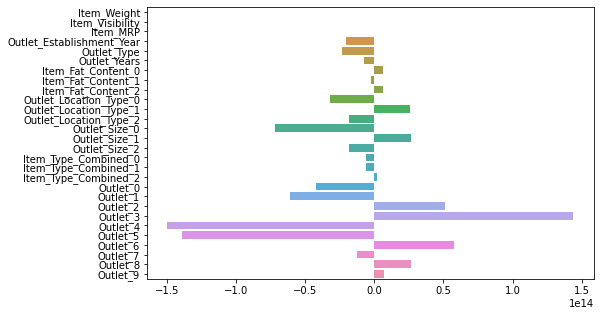

In [47]:
# Barplot for co-efficients 
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

**RMSE**

In [46]:
MSE = metrics.mean_squared_error(y_valid, y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error : ", rmse)

Root Mean Squared Error :  1187.3414020207392


### Let's try Different ML Models

In [48]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

**KNeighborsRegressor : Target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.**

*Regarding Nearest Neigbor Algorithms,2 neighbors neighbor k+1 and k, have identical distances but different labels, the results will depend onthe ordering of the training data*

In [49]:
algos = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regressor']

rmse_list = []

In [50]:
for name in algos : 

  model = name
  model.fit(X_train, y_train)
  y_pred = model.predict(X_valid)
  
  MSE = metrics.mean_squared_error(y_valid, y_pred)

  rmse = np.sqrt(MSE)
  rmse_list.append(rmse)

In [51]:
evaluation = pd.DataFrame({'Model' : names,
                           'RMSE' : rmse_list})

In [52]:
evaluation

,Model,RMSE
0,Linear Regression,1187.448018
1,Ridge Regression,1187.365657
2,Lasso Regression,1187.119373
3,K Neighbors Regression,1287.347911
4,Decision Tree Regressor,1594.491622


> **As we can clearly see Lasso performs slighlty better than Ridge and Linear regression. KNN Regressor and Decision Tree Regressor do not improve the score so we can select Lasso for making our final predictions**




XGBRegressor

In [53]:
from xgboost import XGBRegressor


In [55]:
xgbm = XGBRegressor()
xgbm.fit(X_train, y_train)
pred3 = xgbm.predict(X_valid)
np.sqrt(metrics.mean_squared_error(y_valid, pred3))

[13:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1149.8600343158055

### **GIVES A MUCH BETTER SCORE**

In [58]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
final_prediction = xgbm.predict(test)

submission['Item_Outlet_Sales'] = final_prediction

# Only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index = False)